<h1>Importing the libraries</h1>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

<h1>Accessing Datasets</h1>

In [2]:
dataset_path = "dataset"
imagePaths = list(paths.list_images(dataset_path))

<h1>Setting Hyperparameters</h1>

In [3]:
LR = 1e-4 # Learning Rate
EPOCHS = 20 # Number of Iterations
BS = 32 # Batch Size

<h1>Data Preprocessing</h1>

In [4]:
data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]  # Label is the folder name
    image = load_img(imagePath, target_size=(224, 224))  # Load and resize image
    image = img_to_array(image)
    image = preprocess_input(image)
    
    data.append(image)
    labels.append(label)

# Convert to numpy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

# Encode labels to categorical format
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


<h1>Splitting the Data</h1>

In [5]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

<h1>Data Augmentation</h1>

In [6]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

<h1>Model Architecture</h1>

In [7]:
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

C:\Users\Admin\AppData\Local\Temp\ipykernel_26672\3514362651.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))


In [8]:
model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

<h1>Compiling the Model</h1>

In [9]:
opt = Adam(learning_rate=LR, decay=LR/EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


<h1>Training the Model</h1>

In [10]:
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS
)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


102/102 ━━━━━━━━━━━━━━━━━━━━ 67s 606ms/step - accuracy: 0.6854 - loss: 0.6386 - val_accuracy: 0.9780 - val_loss: 0.1609
Epoch 2/20
  1/102 ━━━━━━━━━━━━━━━━━━━━ 27s 269ms/step - accuracy: 0.9375 - loss: 0.2599

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.9375 - loss: 0.2599 - val_accuracy: 0.9780 - val_loss: 0.1593
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 60s 582ms/step - accuracy: 0.9672 - loss: 0.1819 - val_accuracy: 0.9805 - val_loss: 0.0909
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.9062 - loss: 0.2084 - val_accuracy: 0.9805 - val_loss: 0.0902
Epoch 5/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 60s 583ms/step - accuracy: 0.9670 - loss: 0.1085 - val_accuracy: 0.9841 - val_loss: 0.0663
Epoch 6/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 1.0000 - loss: 0.0406 - val_accuracy: 0.9853 - val_loss: 0.0665
Epoch 7/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 59s 573ms/step - accuracy: 0.9781 - loss: 0.0800 - val_accuracy: 0.9829 - val_loss: 0.0611
Epoch 8/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.9688 - loss: 0.0635 - val_accuracy: 0.9829 - val_loss: 0.0608
Epoch 9/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 59s 580ms/step - accuracy: 0.9788 - loss: 0.0800 - val_accurac

<h1>Evaluating the Model</h1>

In [11]:
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 292ms/step
              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       433
without_mask       0.98      0.99      0.99       386

    accuracy                           0.99       819
   macro avg       0.99      0.99      0.99       819
weighted avg       0.99      0.99      0.99       819



<h1>Saving the Model and Plot</h1>

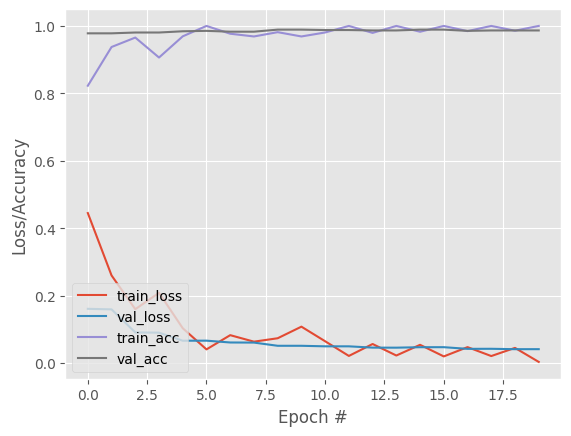

In [12]:
model.save("mask_detector.h5", save_format="h5")

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")